# **Predicción del Riesgo de Enfermedad mediante Regresión Logística binomial en mujeres embarazadas**

1. Importación de Librerías y Lectura del Dataset

In [1]:
import numpy as np
import pandas as pd
from pyparsing import C
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar el dataset
data = pd.read_csv('diabetes.csv')

columnas_a_eliminar=['Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']
data = data.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame
data.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [2]:
# Verificamos la variable dependiente y su distribución. Proporción de riesgo:
print("Proporción de Riesgo:\n", data['Outcome'].value_counts(normalize=True))

Proporción de Riesgo:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


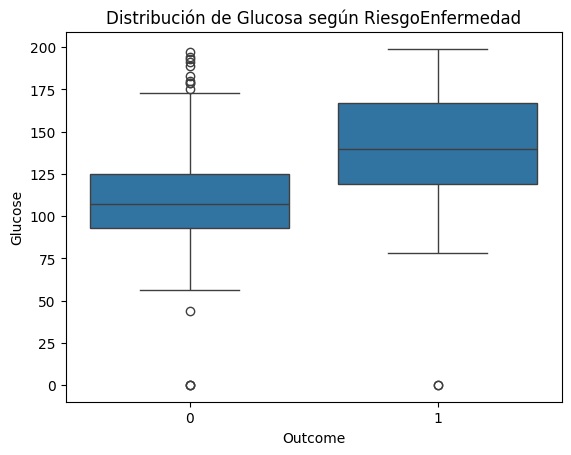

In [3]:
#Usamos gráficos de dispersión para ver la relación entre las variables independientes y la variable dependiente de valor de riesgo:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Distribución de Glucosa según RiesgoEnfermedad')
plt.show()

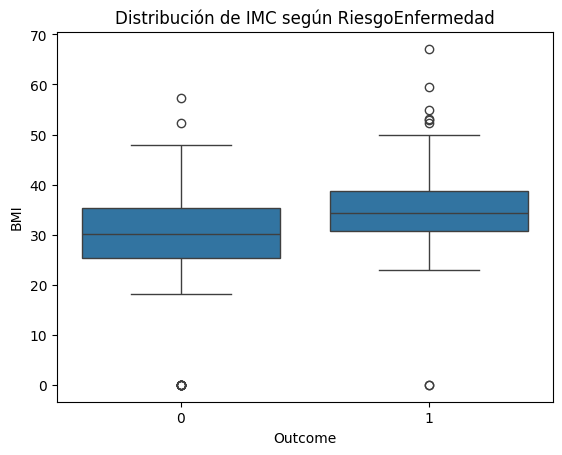

In [4]:
#Usamos gráficos de dispersión para ver la relación entre las variables independientes y la variable dependiente de valor de riesgo:
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('Distribución de IMC según RiesgoEnfermedad')
plt.show()

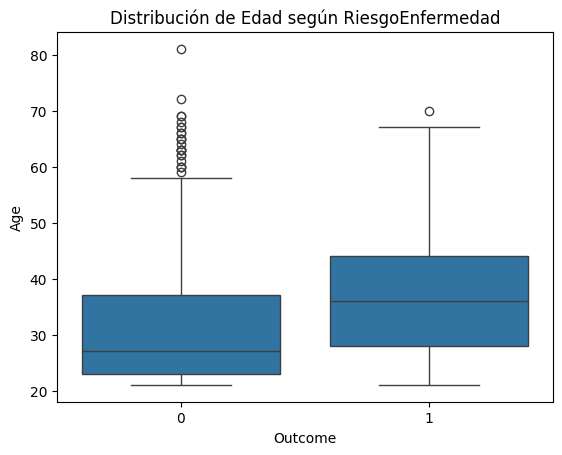

In [5]:
#Usamos gráficos de dispersión para ver la relación entre las variables independientes y la variable dependiente de valor de riesgo:
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Distribución de Edad según RiesgoEnfermedad')
plt.show()

2. Preparación del Dataset

In [6]:
# Separación de variables predictoras (X) y objetivo (y)
X = data[['Glucose', 'BMI', 'Age']]
y = data['Outcome']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

3. Entrenamiento del Modelo de Regresión Logística

In [7]:
# Definición y entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Proporción de aciertos y errores
print("Predicciones correctas:", sum(y_pred == y_test))
print("Predicciones incorrectas:", sum(y_pred != y_test))

Precisión del modelo: 0.7575757575757576
Predicciones correctas: 175
Predicciones incorrectas: 56


4. Evaluación del Modelo

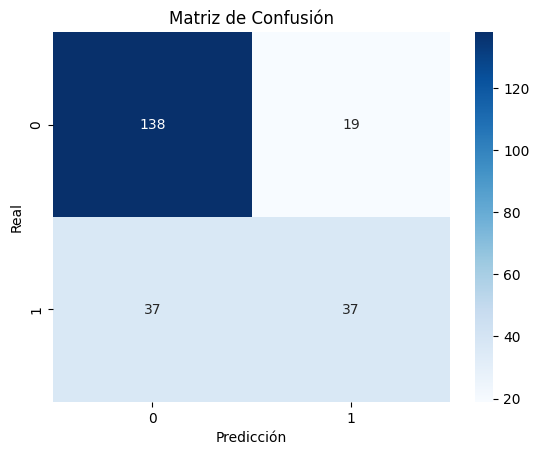

In [8]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [9]:
# Generar la matriz de confusión


# Extraer los valores de TP, FP, TN y FN
TP = conf_matrix[0, 0]  # Verdaderos Positivos
TN = conf_matrix[1, 1]  # Verdaderos Negativos
FP = conf_matrix[0, 1]  # Falsos Positivos
FN = conf_matrix[1, 0]  # Falsos Negativos

# Imprimir los resultados
print(f'Verdaderos Positivos (TP): {TP}')
print(f'Falsos Positivos (FP): {FP}')
print(f'Falsos Negativos (FN): {FN}')
print(f'Verdaderos Negativos (TN): {TN}')

Verdaderos Positivos (TP): 138
Falsos Positivos (FP): 19
Falsos Negativos (FN): 37
Verdaderos Negativos (TN): 37


In [10]:
# Mostrar precision and recall, junto con el resto de métricas
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.789     0.879     0.831       157
           1      0.661     0.500     0.569        74

    accuracy                          0.758       231
   macro avg      0.725     0.689     0.700       231
weighted avg      0.748     0.758     0.747       231



#### Análisis por clase:
Clase 0:
* Buena precisión y recall: Esto indica que el modelo es bueno identificando correctamente los casos positivos de la clase 0 y tiene pocas falsas alarmas.
* Buen F1-score: Confirma el buen equilibrio entre precisión y recall para esta clase.

Clase 1:
* Baja precisión: El modelo no es bueno en sus predicciones positivas para la clase 1
* Bajo recall: Está perdiendo muchos casos positivos de esta clase. Esto significa que el modelo no está capturando todos los ejemplos de la clase 1 que debería.
* F1-score más bajo: Refleja el desequilibrio entre precisión y recall para esta clase.
* Interpretación de las métricas generales:

Promedios
* Accuracy: El modelo parece preciso en general, acertando en el 73% de los casos, sin embargo...
* Macro average: Muestra un buen desempeño promedio para ambas clases, pero enmascara el desequilibrio en la clase 1.
* Weighted average: Considerando el número de muestras en cada clase, el desempeño general es ligeramente menor, lo que indica que el modelo se ve más afectado por el bajo rendimiento en la clase 1. 

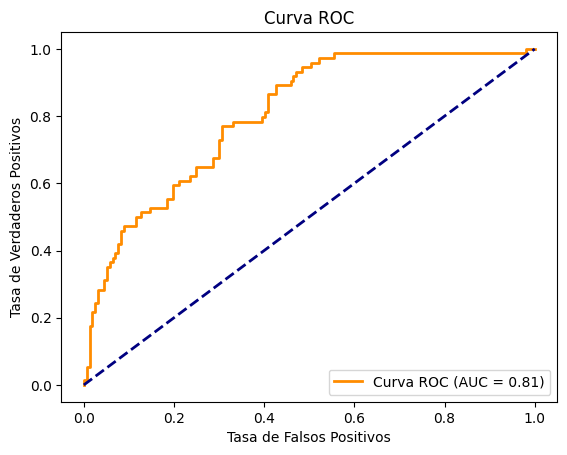

In [11]:
# Obtener probabilidades predichas
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Cálculo de la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Curva ROC (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()